**ANN model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights with small random values
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i in range(len(X)):
                # Forward propagation
                hidden_input = np.dot(X[i], self.weights_input_hidden)
                hidden_output = self.sigmoid(hidden_input)
                output = np.dot(hidden_output, self.weights_hidden_output)
                predicted = self.sigmoid(output)

                # Backpropagation
                output_error = y[i] - predicted
                output_delta = output_error * self.sigmoid_derivative(predicted)

                hidden_error = output_delta.dot(self.weights_hidden_output.T)
                hidden_delta = hidden_error * self.sigmoid_derivative(hidden_output)

                # Update weights
                self.weights_hidden_output += hidden_output.reshape(-1, 1) * output_delta * self.learning_rate
                self.weights_input_hidden += X[i].reshape(-1, 1) * hidden_delta * self.learning_rate

    def predict(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden)
        hidden_output = self.sigmoid(hidden_input)
        output = np.dot(hidden_output, self.weights_hidden_output)
        predicted = self.sigmoid(output)
        return predicted





**Loading the dataset**

In [ ]:

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Split features and target variable
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values.reshape(-1, 1)

data


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

**Correlation between Attributes**

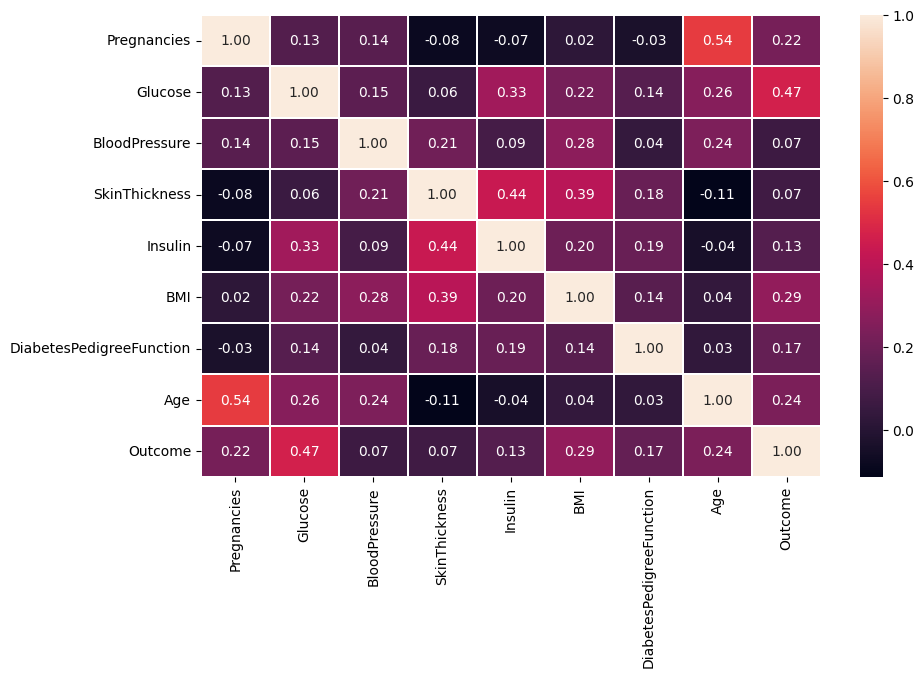

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(exclude=object).corr(),annot=True,fmt=".2f",linewidths=0.2)
plt.show()

**Training model**

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = int(input("Enter size of hidden Layers: "))
output_size = 1
learning_rate = 0.01
epochs = int(input("Enter number of epochs: "))

# Create and train the neural network
model = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model.train(X_train_scaled, y_train, epochs)


Predictions:
     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
149       1          1
150       0          0
151       0          1
152       1          0
153       0          0

[154 rows x 2 columns]
614


**testing Model**

In [ ]:

# Make predictions
predictions = model.predict(X_test_scaled)
predictions = np.round(predictions)  # Round predictions to 0 or 1

# Add predictions to DataFrame
data_test = pd.DataFrame(X_test, columns=data.columns[:-1])
data_test['Actual'] = y_test
data_test['Predicted'] = predictions.astype(int)

# Print predictions
print("Predictions:")
print(data_test[['Actual', 'Predicted']])
print(len(X_train))

**Model Evaluation**

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
correct_labels = sum(y_test == predictions)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels[0], y_test.size))

Accuracy: 0.7402597402597403
Result: 114 out of 154 samples were correctly labeled.
